In this notebook, our goal is to train a CNN model using the CIFAR-10 image dataset. Additionally, we aim to explore and test various techniques, such as augmentation and transfer learning. To proceed, please follow the outlined steps.

# Libraries

Here, you can import the libraries you wish to use. Feel free to add more as needed.

In [2]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

# Load the CIFAR10 dataset

Here, load the CIFAR-10 dataset from the prebuilt datasets in Keras as separate training and validation datasets.

In [3]:
class_names = ("Airplane", "Automobile", "Bird", "Cat", "Deer",
               "Dog", "Frog", "Horse", "Ship", "Truck")

##################################################
################### YOUR CODES ###################

##################################################

(x_train, y_train), (x_val, y_val) = keras.datasets.cifar10.load_data()


print('Training:', x_train.shape, y_train.shape)
print('Validation:', x_val.shape, y_val.shape)

170498071/170498071 [==============================] - 2s 0us/step
Training: (50000, 32, 32, 3) (50000, 1)
Validation: (10000, 32, 32, 3) (10000, 1)


Let's see some random examples.

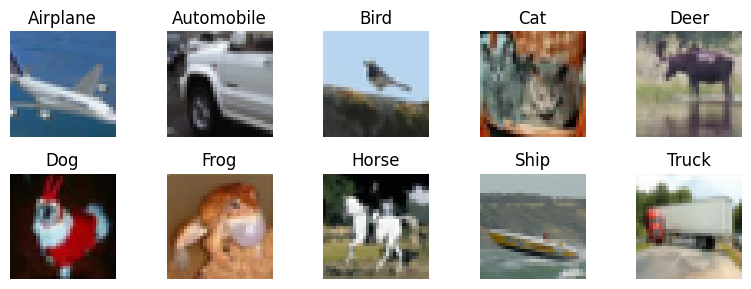

In [21]:
fig = plt.figure(figsize=(8, 3))

for class_index in range(len(class_names)):
    examples = x_train[y_train.flatten() == class_index]
    random_index = np.random.randint(0, examples.shape[0])
    image = examples[random_index]

    ax = fig.add_subplot(2, 5, class_index + 1)
    ax.imshow(image)
    ax.set_title(class_names[class_index])
    ax.axis('off')

plt.tight_layout()
plt.show()

Remember to `normalize` your data and encode your labels using the `one-hot encoding` technique.

In [4]:
##################################################
################### YOUR CODES ###################

##################################################

num_classes = 10

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_val = x_val.astype("float32") / 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

# a) Simple CNN model
In this section, you have to create your own simple CNN model using either the sequential or functional API provided by the Keras library. You can refer to the example provided in this [link](https://keras.io/examples/vision/mnist_convnet/) for guidance. Feel free to design your model according to your preferences.

In [23]:
from keras.api._v2.keras import activations
##################################################
################### YOUR CODES ###################

##################################################

# Define the LeNet-5 model
model = keras.Sequential()

# Layer 1: Convolutional Layer
model.add(keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=x_train[0].shape))

# Layer 2: Max Pooling Layer
model.add(keras.layers.MaxPooling2D())

# Layer 3: Convolutional Layer
model.add(keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))

# Layer 4: Max Pooling Layer
model.add(keras.layers.MaxPooling2D())

# Layer 5: Flatten Layer
model.add(keras.layers.Flatten())

# Layer 6: Fully Connected Layer
model.add(keras.layers.Dense(units=120, activation='relu'))

# Layer 7: Fully Connected Layer
model.add(keras.layers.Dense(units=84, activation='relu'))

# Layer 8: Output Layer
model.add(keras.layers.Dense(units=10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 400)               0         
                                                                 
 dense_6 (Dense)             (None, 120)              

Now, it's time to compile your model using an appropriate `loss function` and `optimizer`.

In [24]:
##################################################
################### YOUR CODES ###################
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
##################################################

Train your model for `10 epochs` and proper `batch_size`.

In [25]:
##################################################
################### YOUR CODES ###################
history = model.fit(x_train, y_train,
                    batch_size=100,
                    epochs=10,
                    validation_data=(x_val, y_val),
                    shuffle=True)
##################################################

Epoch 1/10
500/500 [==============================] - 7s 10ms/step - loss: 1.6885 - accuracy: 0.3838 - val_loss: 1.4823 - val_accuracy: 0.4649
Epoch 2/10
500/500 [==============================] - 5s 11ms/step - loss: 1.4119 - accuracy: 0.4893 - val_loss: 1.3464 - val_accuracy: 0.5222
Epoch 3/10
500/500 [==============================] - 5s 9ms/step - loss: 1.3036 - accuracy: 0.5334 - val_loss: 1.3259 - val_accuracy: 0.5292
Epoch 4/10
500/500 [==============================] - 3s 6ms/step - loss: 1.2318 - accuracy: 0.5581 - val_loss: 1.2262 - val_accuracy: 0.5670
Epoch 5/10
500/500 [==============================] - 3s 6ms/step - loss: 1.1746 - accuracy: 0.5809 - val_loss: 1.2192 - val_accuracy: 0.5726
Epoch 6/10
500/500 [==============================] - 2s 5ms/step - loss: 1.1252 - accuracy: 0.6004 - val_loss: 1.1781 - val_accuracy: 0.5798
Epoch 7/10
500/500 [==============================] - 2s 5ms/step - loss: 1.0845 - accuracy: 0.6143 - val_loss: 1.1699 - val_accuracy: 0.5851
Epoc

This function plots the `loss` and `accuracy` of your model by the model's history.

In [10]:
def plot_acc_loss(history):
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    fig = plt.figure(figsize=(10, 3))
    fig.add_subplot(1, 2, 1)
    plt.plot(train_acc)
    plt.plot(val_acc)
    plt.title('Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')

    fig.add_subplot(1, 2, 2)
    plt.plot(train_loss)
    plt.plot(val_loss)
    plt.title('Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')

Let's see your model performance.

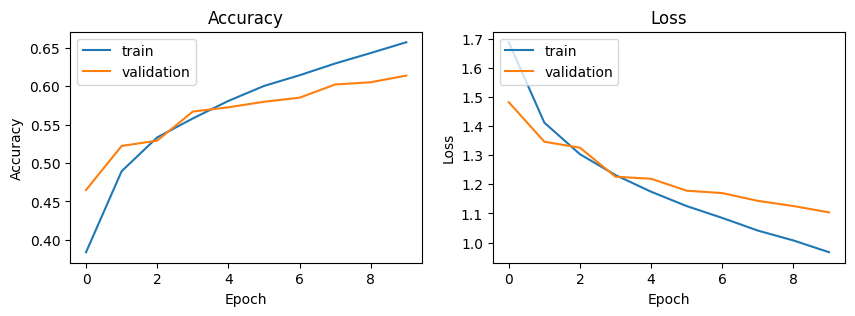

In [27]:
plot_acc_loss(history)

# b) Simple CNN model + augmentation
In this section, you will utilize your previous model and apply `at least two` suitable augmentation techniques. For further guidance, you can refer to this  [link](https://www.tensorflow.org/tutorials/images/data_augmentation).

In [28]:
##################################################
################### YOUR CODES ###################

##################################################

# Define the data augmentation transformations
datageneration = ImageDataGenerator(
    rotation_range=60,  # Rotate the image randomly up to 30 degrees
    width_shift_range=0.1,  # Shift the image horizontally up to 10%
    height_shift_range=0.1,  # Shift the image vertically up to 10%
    shear_range=0.2,  # Shear the image up to 20%
    zoom_range=0.2,  # Zoom the image up to 20%
    horizontal_flip=True,  # Flip the image horizontally
)

# Fit the data augmentation generator to the training data
datageneration.fit(x_train)


# Define the LeNet-5 model
modelaug = keras.Sequential()

# Layer 1: Convolutional Layer
modelaug.add(keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=x_train[0].shape))

# Layer 2: Max Pooling Layer
modelaug.add(keras.layers.MaxPooling2D())

# Layer 3: Convolutional Layer
modelaug.add(keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))

# Layer 4: Max Pooling Layer
modelaug.add(keras.layers.MaxPooling2D())

# Layer 5: Flatten Layer
modelaug.add(keras.layers.Flatten())

# Layer 6: Fully Connected Layer
modelaug.add(keras.layers.Dense(units=120, activation='relu'))

# Layer 7: Fully Connected Layer
modelaug.add(keras.layers.Dense(units=84, activation='relu'))

# Layer 8: Output Layer
modelaug.add(keras.layers.Dense(units=10, activation='softmax'))

modelaug.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 400)               0         
                                                                 
 dense_9 (Dense)             (None, 120)              

In [29]:
num_augmented_data = 0
for x_batch, y_batch in datageneration.flow(x_train, y_train, batch_size=100, shuffle=False):
    num_augmented_data += x_batch.shape[0]
    if num_augmented_data >= len(x_train):
        break

print("Number of augmented data: ", num_augmented_data)

Number of augmented data:  50000


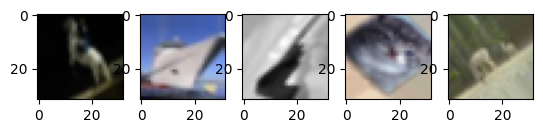

In [30]:
train_datagen = datageneration.flow(x_train, y_train, batch_size=100)
x_augmented, y_augmented = next(train_datagen)
x_sample = x_augmented
# np.concatenate((x_train[:5], x_augmented[:5]))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_sample[i])
plt.show()

(100000, 32, 32, 3)
(100000, 10)


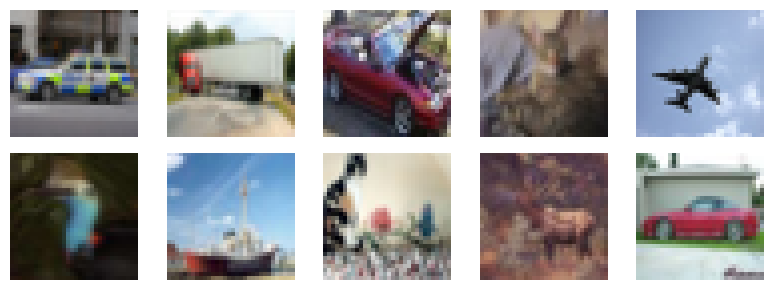

In [31]:
new_train_generator =datageneration.flow(x_train, y_train, batch_size=100)


# # combine two dataset
x_train_combined = np.concatenate([x_train, new_train_generator.x])
y_train_combined = np.concatenate([y_train,new_train_generator.y])


print(x_train_combined.shape)
print(y_train_combined.shape)



fig = plt.figure(figsize=(8, 3))

for class_index in range(len(class_names)):
    random_index = np.random.randint(50000, x_train_combined.shape[0])
    image = x_train_combined[random_index]
    ax = fig.add_subplot(2, 5, class_index + 1)
    ax.imshow(image)
    # ax.set_title(class_names[class_index])
    ax.axis('off')

plt.tight_layout()
plt.show()


In [32]:
modelaug.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [33]:
##################################################
################### YOUR CODES ###################
historyaug = modelaug.fit(x_train_combined, y_train_combined,
                    epochs=10,
                    batch_size=100,
                    validation_data=(x_val, y_val),
                    shuffle=True)
##################################################

Epoch 1/10
1000/1000 [==============================] - 7s 6ms/step - loss: 1.5690 - accuracy: 0.4293 - val_loss: 1.3704 - val_accuracy: 0.5024
Epoch 2/10
1000/1000 [==============================] - 5s 5ms/step - loss: 1.2913 - accuracy: 0.5382 - val_loss: 1.2465 - val_accuracy: 0.5547
Epoch 3/10
1000/1000 [==============================] - 5s 5ms/step - loss: 1.1768 - accuracy: 0.5828 - val_loss: 1.2211 - val_accuracy: 0.5646
Epoch 4/10
1000/1000 [==============================] - 5s 5ms/step - loss: 1.0976 - accuracy: 0.6105 - val_loss: 1.1585 - val_accuracy: 0.5892
Epoch 5/10
1000/1000 [==============================] - 5s 5ms/step - loss: 1.0402 - accuracy: 0.6324 - val_loss: 1.1747 - val_accuracy: 0.5905
Epoch 6/10
1000/1000 [==============================] - 5s 5ms/step - loss: 0.9913 - accuracy: 0.6506 - val_loss: 1.1143 - val_accuracy: 0.6089
Epoch 7/10
1000/1000 [==============================] - 5s 5ms/step - loss: 0.9412 - accuracy: 0.6678 - val_loss: 1.1088 - val_accuracy:

Let's see your model performance with augmentation.

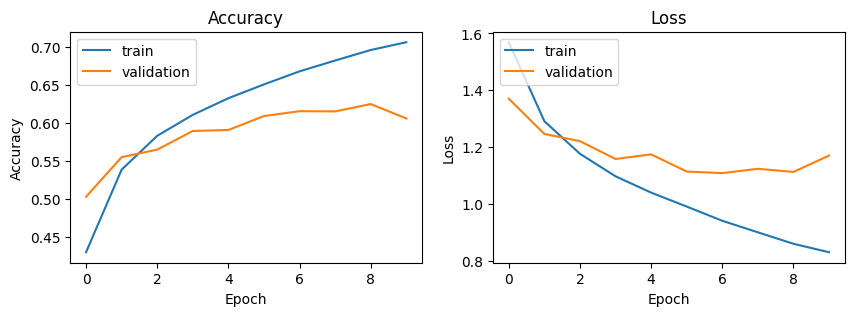

In [34]:
plot_acc_loss(historyaug)

# c) Transfer learning: Using pretrained ResNet50 on ImageNet
For more detailed guidance, please refer to this [link](https://keras.io/guides/transfer_learning/).

## Resize input to 224 * 224 (`extra bonus`)

In [44]:
from tensorflow.keras.applications.resnet50 import ResNet50
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Loading pre-trained ResNet50 model on ImageNet dataset
base_model = ResNet50(weights='imagenet', include_top=False)

modelres = keras.Sequential([
    tf.keras.layers.Resizing(224, 224),
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(num_classes, activation='softmax')
])
modelres.build(input_shape=(None, 224, 224, 3))

modelres.summary(expand_nested=True)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_5 (Resizing)       (None, 224, 224, 3)       0         
                                                                 
 resnet50 (Functional)       (None, None, None, 2048)  23587712  
|¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯|
| input_8 (InputLayer)      [(None, None, None, 3)]   0         |
|                                                               |
| conv1_pad (ZeroPadding2D)  (None, None, None, 3)    0         |
|                                                               |
| conv1_conv (Conv2D)       (None, None, None, 64)    9472      |
|                                                               |
| conv1_bn (BatchNormalizatio  (None, None, None, 64)  256      |
| n)                                                            |
|                                                     

In [45]:
modelres.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [46]:
historyres = modelres.fit(x_train, y_train,
                    epochs=10,
                    batch_size=100,
                    validation_data=(x_val, y_val),
                    shuffle=True)

Epoch 1/10
500/500 [==============================] - 540s 985ms/step - loss: 0.5809 - accuracy: 0.8014 - val_loss: 3.5713 - val_accuracy: 0.1071
Epoch 2/10
500/500 [==============================] - 478s 955ms/step - loss: 0.3127 - accuracy: 0.8938 - val_loss: 0.7411 - val_accuracy: 0.7550
Epoch 3/10
500/500 [==============================] - 477s 954ms/step - loss: 0.2178 - accuracy: 0.9245 - val_loss: 0.5516 - val_accuracy: 0.8200
Epoch 4/10
500/500 [==============================] - 477s 954ms/step - loss: 0.1584 - accuracy: 0.9445 - val_loss: 0.7219 - val_accuracy: 0.7869
Epoch 5/10
500/500 [==============================] - 477s 953ms/step - loss: 0.1222 - accuracy: 0.9575 - val_loss: 0.4331 - val_accuracy: 0.8620
Epoch 6/10
500/500 [==============================] - 477s 954ms/step - loss: 0.0918 - accuracy: 0.9675 - val_loss: 1.1324 - val_accuracy: 0.7431
Epoch 7/10
500/500 [==============================] - 477s 954ms/step - loss: 0.0769 - accuracy: 0.9739 - val_loss: 0.4873 -

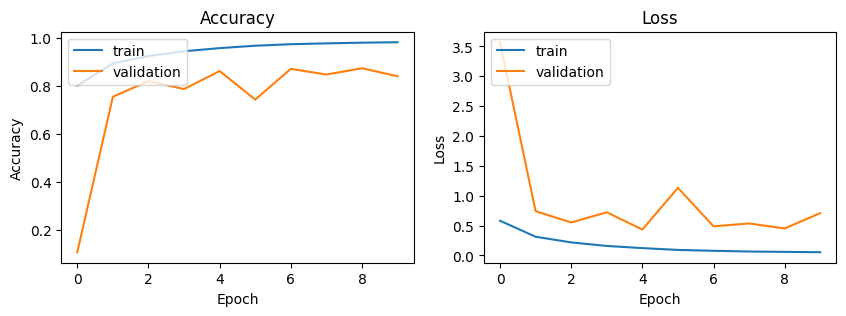

In [47]:
plot_acc_loss(historyres)

## Use only the first three blocks (`extra bonus`)

In [5]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models

# Load the ResNet50 model with pre-trained weights
base_model = ResNet50(weights='imagenet', include_top=False)

# Get the output of the layer "out_4block_3conv"
output = base_model.get_layer("conv3_block4_out").output

# Add some layers on top of the output
x = layers.GlobalAveragePooling2D()(output)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
p = layers.Dense(num_classes, activation='softmax')(x)

# Define the new model
modelrez3layer = models.Model(inputs=base_model.input, outputs=p)


In [7]:
# Compile the model
modelrez3layer.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Train the model
history3layer = modelrez3layer.fit(x_train, y_train, batch_size=100, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
500/500 [==============================] - 298s 584ms/step - loss: 0.9734 - accuracy: 0.6729 - val_loss: 4.1515 - val_accuracy: 0.1400
Epoch 2/10
500/500 [==============================] - 301s 601ms/step - loss: 0.6646 - accuracy: 0.7800 - val_loss: 1.2684 - val_accuracy: 0.6174
Epoch 3/10
500/500 [==============================] - 290s 581ms/step - loss: 0.5379 - accuracy: 0.8196 - val_loss: 1.0848 - val_accuracy: 0.6827
Epoch 4/10
500/500 [==============================] - 299s 598ms/step - loss: 0.4548 - accuracy: 0.8509 - val_loss: 0.8730 - val_accuracy: 0.7319
Epoch 5/10
500/500 [==============================] - 299s 598ms/step - loss: 0.3794 - accuracy: 0.8728 - val_loss: 1.1744 - val_accuracy: 0.6945
Epoch 6/10
500/500 [==============================] - 289s 577ms/step - loss: 0.3184 - accuracy: 0.8928 - val_loss: 0.8903 - val_accuracy: 0.7226
Epoch 7/10
500/500 [==============================] - 288s 576ms/step - loss: 0.2767 - accuracy: 0.9089 - val_loss: 0.8202 -

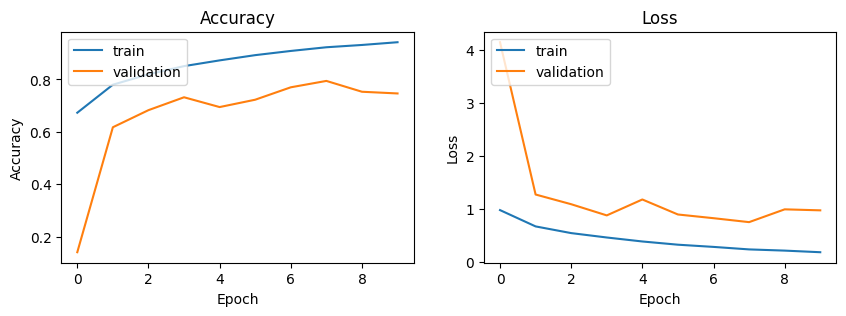

In [11]:
plot_acc_loss(history3layer)